# 타이타닉 예제 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings(action='ignore') # 경고 무시

In [6]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [13]:
df_train[df_train['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [14]:
df_train[df_train['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [15]:
df_train[df_train['Age'] < 5].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


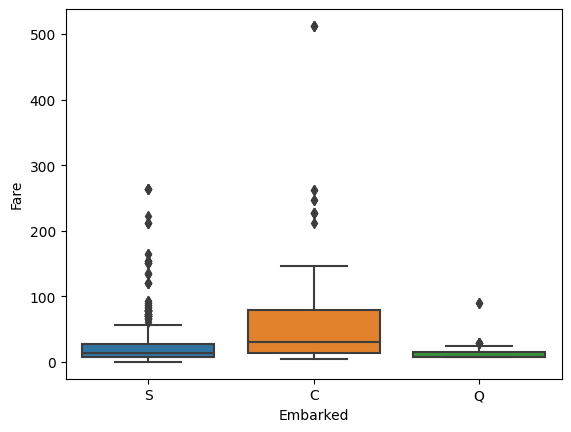

In [22]:
sns.boxplot(x='Embarked', y='Fare', data=df_train)
plt.show()

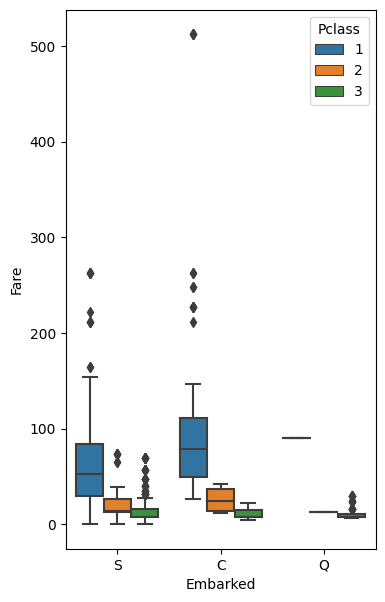

In [24]:
plt.figure(figsize = (4, 7))
plt.grid(False)
sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=df_train)
plt.show()

In [26]:
total = df_train.isnull().sum().sort_values(ascending=False)
# 누락 데이터 총 개수 구하기
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [30]:
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
# 누락 값의 비율 구하기
percent

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [32]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Text(0.5, 1.0, 'Total Missing Value (%)')

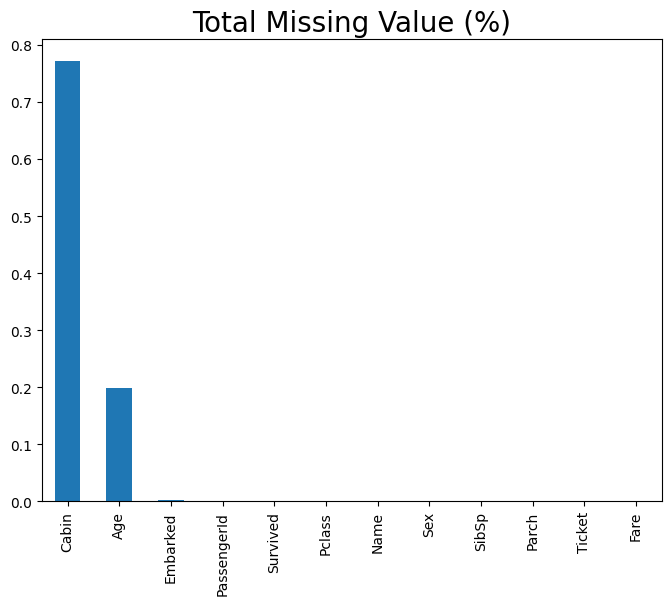

In [34]:
percent.plot(kind="bar", figsize = (8,6), fontsize = 10)
plt.grid(False)
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value (%)", fontsize = 20)

Text(0.5, 1.0, 'Correlation with Missing Values')

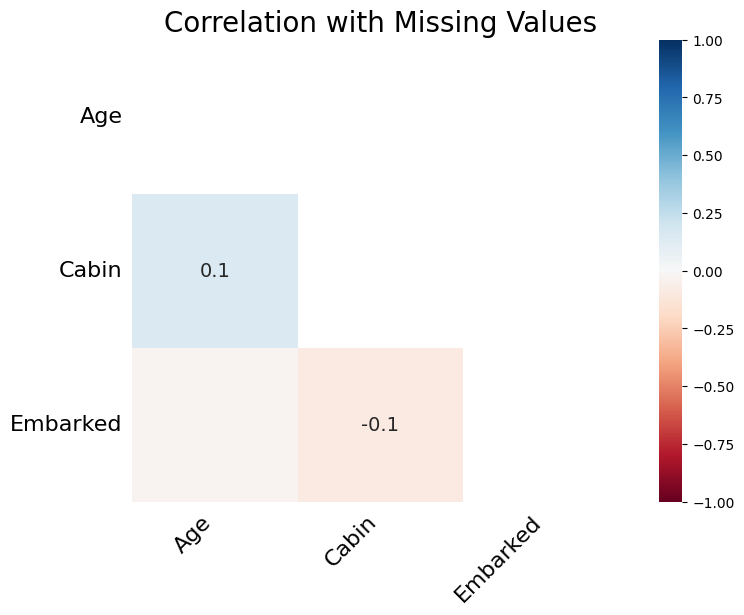

In [35]:
import missingno as msno
# pip install missingno : 결측치 시각화 도구중 하나임

missingdata_df = df_train.columns[df_train.isnull().any()].tolist()
# 결측 데이터(컬럼)만 추출

msno.heatmap(df_train[missingdata_df], figsize=(8,6))

plt.title("Correlation with Missing Values", fontsize = 20)

Text(0.5, 1.0, 'Correlation with Missing Values')

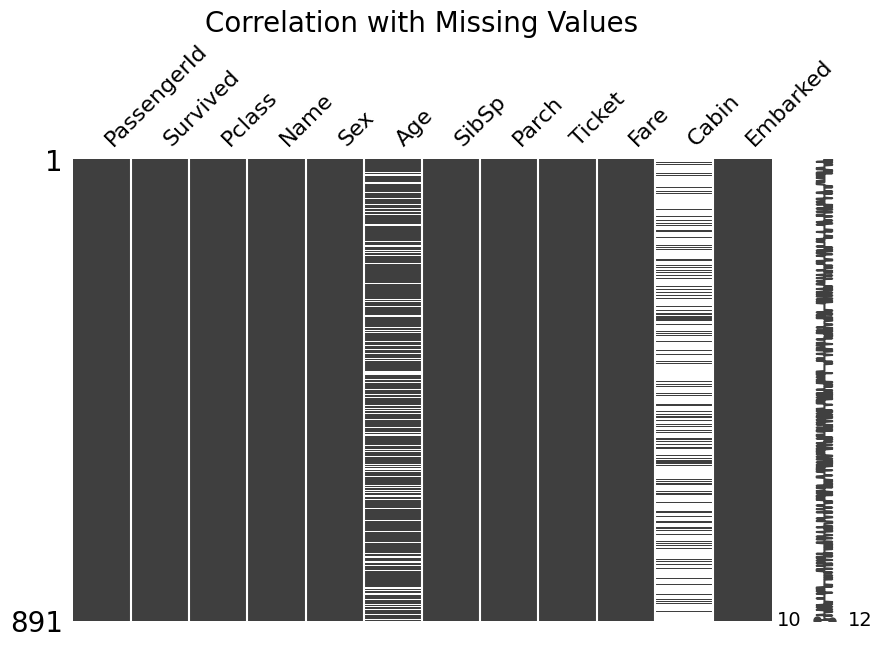

In [36]:
msno.matrix(df_train, figsize=(10, 6))
plt.title("Correlation with Missing Values", fontsize = 20)

Text(0.5, 1.0, 'Correlation with Missing Values')

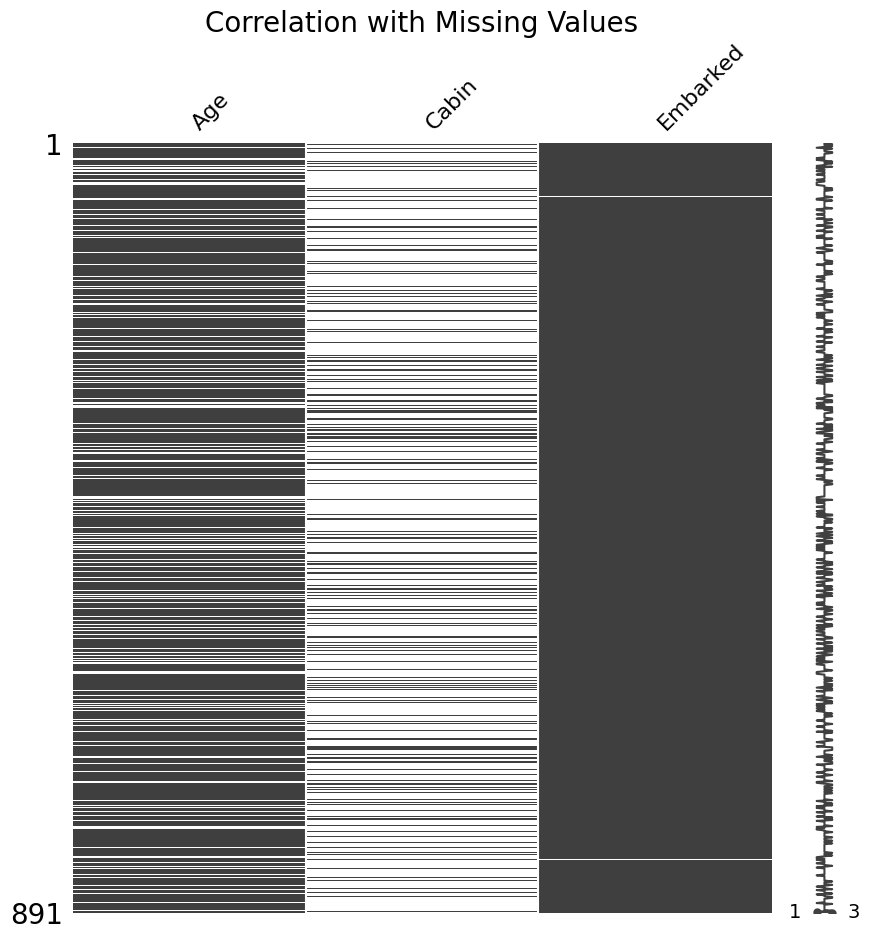

In [41]:
missingdata_df = df_train.columns[df_train.isnull().any()].tolist()
# 결측 데이터(컬럼)만 추출

msno.matrix(df_train[missingdata_df], figsize=(10, 10))

plt.title("Correlation with Missing Values", fontsize = 20)

Text(0.5, 1.0, 'Correlation with Missing Values')

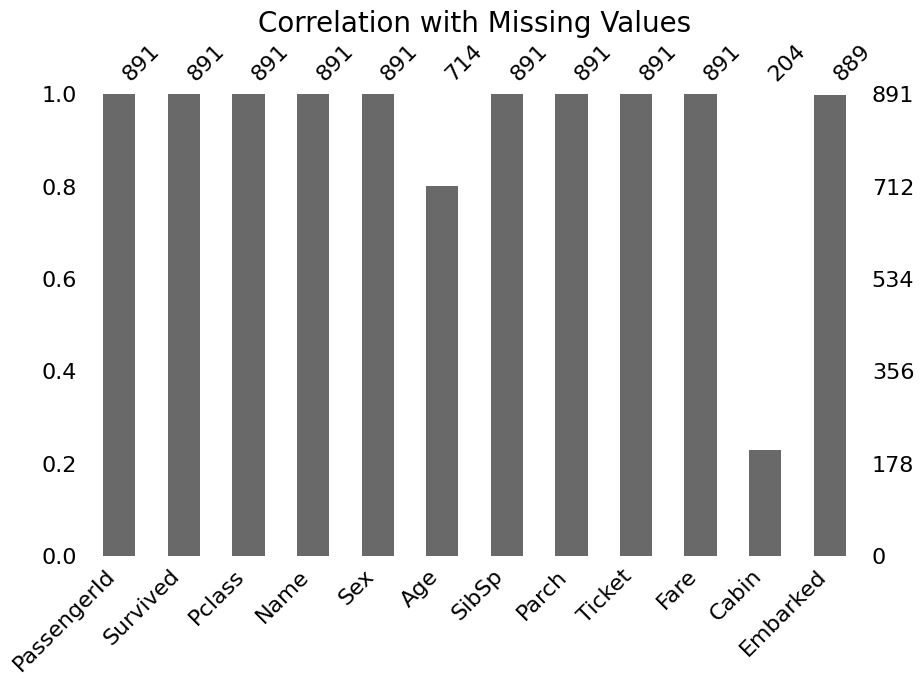

In [42]:
msno.bar(df_train, figsize=(10,6))

plt.title("Correlation with Missing Values", fontsize = 20)

In [47]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train[['Age']])

Age_imputed = pd.DataFrame(imp_mean.transform(df_train[['Age']]),
                          columns={'Age'})
Age_imputed

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [48]:
imp_most = SimpleImputer(strategy='most_frequent')
imp_most.fit(df_train[['Embarked']])

Embarked_imputed = pd.DataFrame(imp_most.transform(df_train[['Embarked']]),
                                columns={'Embarked'})
Embarked_imputed

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [49]:
from impyute.imputation.cs import mice
# pip install impyute

df_train_num = df_train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
                             axis=1)
# 수치가 아닌 데이터는 모두 삭제

np_imputed = mice(df_train_num.values)
# mice 학습 시작

df_imputed = pd.DataFrame(np_imputed, columns=['PassengerId',
                                               'Survived',
                                               'Pclass','Age',
                                               'SibSp',
                                               'Parch',
                                               'Fare'])

df_imputed

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,2.0,1.0,1.0,38.000000,1.0,0.0,71.2833
2,3.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,4.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,5.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,888.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,889.0,0.0,3.0,23.457198,1.0,2.0,23.4500
889,890.0,1.0,1.0,26.000000,0.0,0.0,30.0000


# 타이타닉 예제 2

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [112]:
df_train = pd.read_csv('./titanic/train.csv')
df_test = pd.read_csv('./titanic/test.csv')

In [114]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [115]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [64]:
train_df_copy = df_train.drop(['Survived'], axis=1)
total_set = pd.concat([train_df_copy, df_test])
total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [65]:
train_data = df_train.copy()

In [66]:
# Null Data Check

total_set.isnull().sum()
total_set.isnull().sum() / len(total_set)
# Cabin          0.774637
# Cabin 의 Null Data percentage가 77퍼센트이기 때문에, 이 열은 drop 한다.

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.200917
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000764
Cabin          0.774637
Embarked       0.001528
dtype: float64

In [67]:
total_set.drop('Cabin', axis=1, inplace=True)

In [68]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


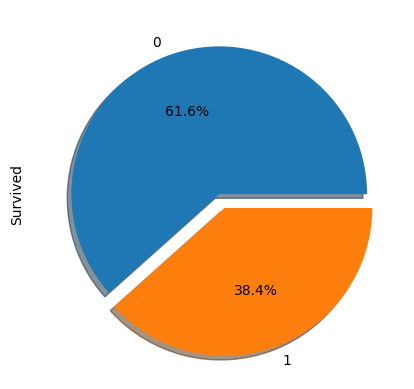

In [69]:
# train data 의 전체 생존률을 확인해보자. 생존률은 38.4 % 이다.

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                             autopct='%1.1f%%',
                                             shadow=True)
plt.show()

In [73]:
# Sex Feature -> 카테고리 데이터로 변환

# 성별 별로 생존률을 확인해보면 아래와 같이 남성의 생존률은 약 19%이며,
# 여성의 생존률은 약 74%이다.

len(df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)]) / len(df_train.loc[(df_train['Sex'] == 'male')]) * 100
# 18.890814558058924

18.890814558058924

In [72]:
len(df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]) / len(df_train.loc[(df_train['Sex'] == 'female')]) * 100
# 74.20382165605095

74.20382165605095

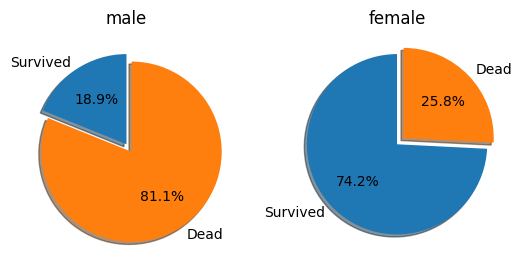

In [88]:
# 성별 별로 생존률을 파이 차트로 나타내면 아래와 같다.

labels = 'Survived', 'Dead'

sizes_m = [len(df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 1)]),
           len(df_train.loc[(df_train['Sex'] == 'male') & (df_train['Survived'] == 0)])]

sizes_f = [len(df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]),
          len(df_train.loc[(df_train['Sex'] == 'female') & (df_train['Survived'] == 0)])]

explode = (0, 0.1)

fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.pie(sizes_m,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
ax1.set_title('male')

ax2.pie(sizes_f,
        explode=explode,
        labels=labels,
        autopct='%1.1f%%',
        shadow=True,
        startangle=90)
ax2.set_title('female')

plt.show()

In [90]:
# 이는 성별에 따라 생존률에 영향이 있음을 알 수 있다.
# 성별의 값은 male, female 두가지가 있으므로 아래와 같이 category 값 0, 1 로 변환해주었다.

total_set['Sex'].unique()

total_set['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

train_data['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,S


In [94]:
# 이름

total_set['Name']

# Mr. Mrs. Miss. 등의 값만 뽑아본다.

import re

def find_M(datas):
    wow = re.search('[A-Z][a-z]+\.', datas)
    if wow == None:
        return None
    return wow.group(0)

total_set['Name_convert'] = total_set['Name'].map(find_M)

train_data['Name_convert'] = train_data['Name'].map(find_M)

total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,S,Mr.
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,Dona.
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr.
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,S,Mr.


In [95]:
# 뽑아낸 값들과 각 값들의 수를 count 해본다.

total_set["Name_convert"]
total_set["Name_convert"].value_counts()

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Mlle.          2
Major.         2
Ms.            2
Lady.          1
Sir.           1
Mme.           1
Don.           1
Capt.          1
Countess.      1
Jonkheer.      1
Dona.          1
Name: Name_convert, dtype: int64

In [96]:
total_set[total_set["Name_convert"]=='Dr.']
# 개수가 애매한 Dr. 승객들을 살펴보니 1명을 제외하고 남자이다.
# 그래서 Dr. 은 Mr.과 동일하게 처리하도록 하고 나중에 여자 1명만 Mrs.로 변경하도록 핚다.(PassengerId = 797)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
245,246,1,"Minahan, Dr. William Edward",0,44.0,2,0,19928,90.0000,Q,Dr.
317,318,2,"Moraweck, Dr. Ernest",0,54.0,0,0,29011,14.0000,S,Dr.
398,399,2,"Pain, Dr. Alfred",0,23.0,0,0,244278,10.5000,S,Dr.
632,633,1,"Stahelin-Maeglin, Dr. Max",0,32.0,0,0,13214,30.5000,C,Dr.
660,661,1,"Frauenthal, Dr. Henry William",0,50.0,2,0,PC 17611,133.6500,S,Dr.
766,767,1,"Brewe, Dr. Arthur Jackson",0,NaN,0,0,112379,39.6000,C,Dr.
796,797,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,S,Dr.
293,1185,1,"Dodge, Dr. Washington",0,53.0,1,1,33638,81.8583,S,Dr.


In [97]:
total_set[total_set["Name_convert"]=='Rev.']
# 상위 4개값 Mr. Miss. Mrs. Master. 은 0~3 으로 매칭시키고, Dr. Rev. Major. , Col. Sir. 은 Mr.과 같은
# 값으로 처리핚다. Lady., Ms. Mlle. 는 Miss. 와 같은 값으로 처리핚다. 나머지는 4 로 매칭시킨다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert
149,150,2,"Byles, Rev. Thomas Roussel Davids",0,42.0,0,0,244310,13.000,S,Rev.
150,151,2,"Bateman, Rev. Robert James",0,51.0,0,0,S.O.P. 1166,12.525,S,Rev.
249,250,2,"Carter, Rev. Ernest Courtenay",0,54.0,1,0,244252,26.000,S,Rev.
626,627,2,"Kirkland, Rev. Charles Leonard",0,57.0,0,0,219533,12.350,Q,Rev.
848,849,2,"Harper, Rev. John",0,28.0,0,1,248727,33.000,S,Rev.
886,887,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.000,S,Rev.
149,1041,2,"Lahtinen, Rev. William",0,30.0,1,1,250651,26.000,S,Rev.
164,1056,2,"Peruschitz, Rev. Joseph Maria",0,41.0,0,0,237393,13.000,S,Rev.


In [98]:
total_set["name_code"] = total_set.Name_convert.map({"Mr.":0,
                                                     "Miss.":1,
                                                     "Mrs.":2,
                                                     "Master.":3,
                                                     "Dr.":0,
                                                     "Rev.":0,
                                                     "Major.":0,
                                                     "Col.":0,
                                                     "Sir.":0,
                                                     "Lady.":1,
                                                     "Ms.":1,
                                                     "Mlle.":1 } )
total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.,2.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.,2.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,S,Mr.,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,Dona.,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr.,0.0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,S,Mr.,0.0


In [99]:
total_set["name_code"]

0      0.0
1      2.0
2      1.0
3      2.0
4      0.0
      ... 
413    0.0
414    NaN
415    0.0
416    0.0
417    3.0
Name: name_code, Length: 1309, dtype: float64

In [100]:
total_set["name_code"].value_counts()

0.0    780
1.0    265
2.0    197
3.0     61
Name: name_code, dtype: int64

In [101]:
total_set[total_set["name_code"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
30,31,1,"Uruchurtu, Don. Manuel E",0,40.0,0,0,PC 17601,27.7208,C,Don.,NaN
369,370,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3000,C,Mme.,NaN
745,746,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.0000,S,Capt.,NaN
759,760,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86.5000,S,Countess.,NaN
822,823,1,"Reuchlin, Jonkheer. John George",0,38.0,0,0,19972,0.0000,S,Jonkheer.,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,Dona.,NaN


In [104]:
total_set["name_code"].fillna(4, inplace=True)
total_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Pclass        1309 non-null   int64  
 2   Name          1309 non-null   object 
 3   Sex           1309 non-null   int64  
 4   Age           1046 non-null   float64
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Ticket        1309 non-null   object 
 8   Fare          1308 non-null   float64
 9   Embarked      1307 non-null   object 
 10  Name_convert  1309 non-null   object 
 11  name_code     1309 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 165.2+ KB


In [105]:
total_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr.,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs.,2.0
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs.,2.0
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,S,Mr.,0.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C,Dona.,4.0
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr.,0.0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,S,Mr.,0.0


In [106]:
total_set.loc[(total_set['name_code'] == 0) & (total_set['Sex'] == 1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_convert,name_code
796,797,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,S,Dr.,0.0


In [110]:
total_set.loc[(total_set['name_code'] == 0) & (total_set['Sex'] == 1), ['name_code']] = 2

In [116]:
# Name column 에서 에서 Mr. Mrs. 등 추출했으므로 Name column , Name_convert 열은 삭제한다.
total_set.drop(["Name", "Name_convert"], axis=1, inplace=True)
total_set

KeyError: "['Name' 'Name_convert'] not found in axis"

In [117]:
# train_data 도 변환시켜준다.

train_data["name_code"] = train_data.Name_convert.map({"Mr.":0,
                                                       "Miss.":1,
                                                       "Mrs.":2,
                                                       "Master.":3,
                                                       "Dr.":0,
                                                       "Rev.":0,
                                                       "Major.":0,
                                                       "Col.":0,
                                                       "Sir.":0,
                                                       "Lady.":1,
                                                       "Ms.":1,
                                                       "Mlle.":1})

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_convert,name_code
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,Rev.,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,Miss.,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,Mr.,0.0


In [118]:
train_data.loc[ (train_data['name_code']==0) & (train_data['Sex']==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_convert,name_code
796,797,1,1,"Leader, Dr. Alice (Farnham)",1,49.0,0,0,17465,25.9292,D17,S,Dr.,0.0


In [119]:
train_data.loc[ (train_data['name_code']==0) & (train_data['Sex']==1), ['name_code']] = 2

In [120]:
train_data["name_code"].fillna(4, inplace=True)

In [121]:
train_data.drop(["Name", "Name_convert"], axis=1, inplace=True)

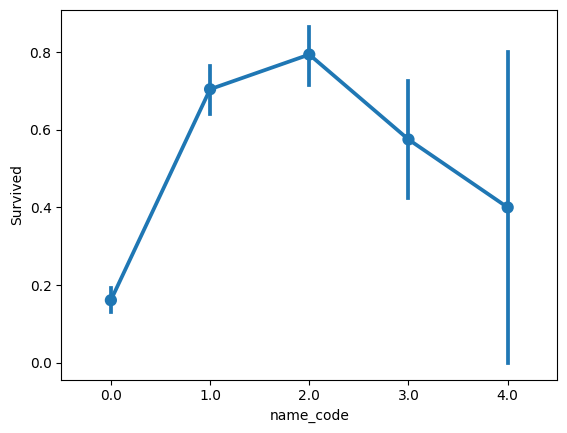

In [132]:
# Name_code 벿 생존률을 Factor plot 으로 살펴보자. Factor plot은 다양핚 범주형 값을 가지는
# 데이터를 시각화할 수 있다.
# – Name_code : "Mr.":0, "Miss.":1, "Mrs.":2, "Master.":3 그 외 : 4

import seaborn as sns
sns.pointplot(x='name_code', y='Survived', data=train_data)
plt.show()

In [127]:
pd.crosstab(train_data.Pclass,
            train_data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


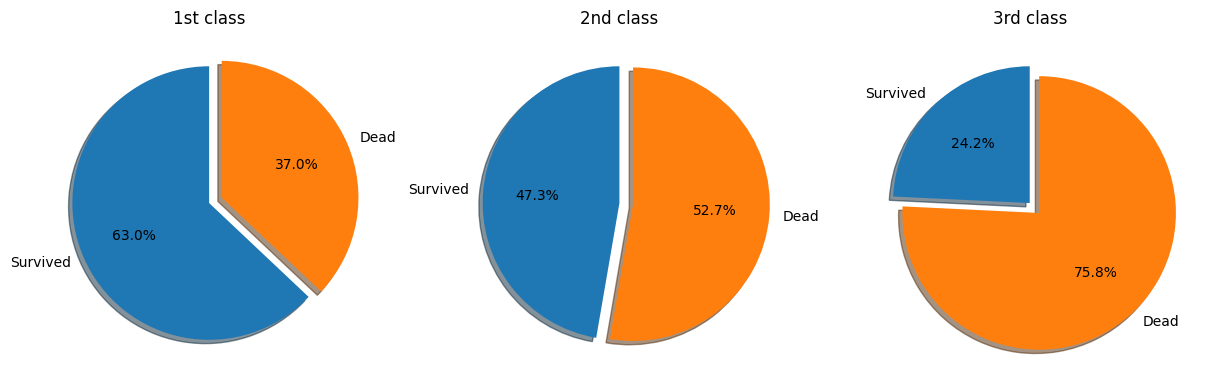

In [137]:
labels = 'Survived', 'Dead'
sizes_1 = [len(train_data.loc[(train_data["Pclass"]==1) & (train_data["Survived"]==1)]),
           len(train_data.loc[(train_data["Pclass"]==1) & (train_data["Survived"]==0)])]

sizes_2 = [len(train_data.loc[(train_data["Pclass"]==2) & (train_data["Survived"]==1)]),
           len(train_data.loc[(train_data["Pclass"]==2) & (train_data["Survived"]==0)])]

sizes_3 = [len(train_data.loc[(train_data["Pclass"]==3) & (train_data["Survived"]==1)]),
           len(train_data.loc[(train_data["Pclass"]==3) & (train_data["Survived"]==0)])]


explode = (0, 0.1)
fig = plt.figure()
fig.set_size_inches(15,5)

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1st class')

ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('2nd class')

ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.set_title('3rd class')

plt.show()

In [135]:
pd.crosstab([train_data.Pclass,
             train_data.Sex],
            train_data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')

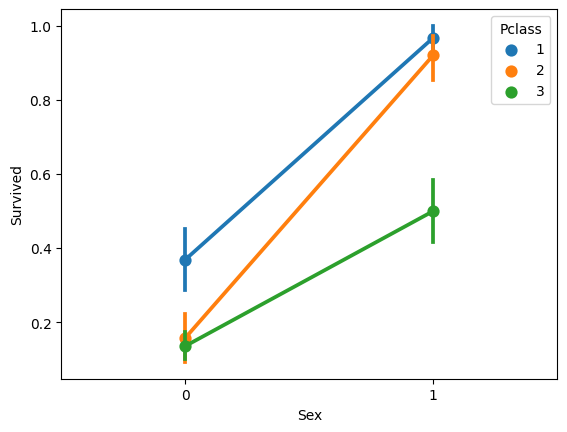

In [141]:
sns.pointplot(x='Sex', y='Survived', hue='Pclass', data=train_data)

plt.show()

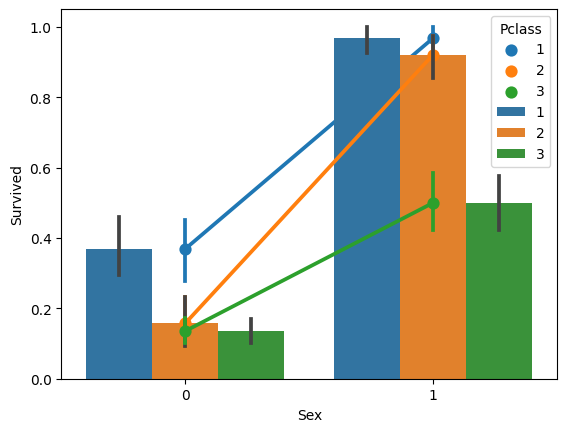

In [142]:
plt.figure()

sns.pointplot(x='Sex', y='Survived', hue='Pclass', data=train_data)
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_data)

plt.show()

In [143]:
total_set ["Age"].isnull().sum()
total_set ["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [144]:
total_set.groupby(["Pclass", "Sex"])["Age"].mean()

Pclass  Sex
1       0      41.029272
        1      37.037594
2       0      30.815380
        1      27.499223
3       0      25.962264
        1      22.185329
Name: Age, dtype: float64

In [145]:
total_set["Age"].fillna( total_set.groupby(["Pclass", "Sex"])["Age"].transform("mean"),
                        inplace=True)

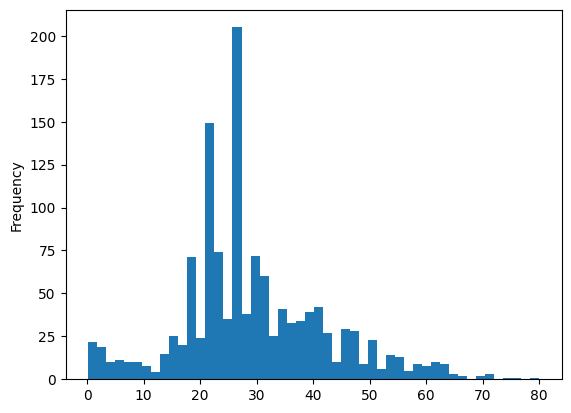

In [146]:
total_set["Age"].plot.hist(bins=50)

plt.show()